<a href="https://colab.research.google.com/github/Sana-Izumi/Natural_Language_Processing/blob/main/Final%20Project/English_Correcting_Chatbot_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Data from a Corpus or Dataset

In [1]:
import nltk
from nltk.corpus import words

# Download the dataset if not already done
nltk.download('words')

# Load the dataset
word_list = words.words()
print(f"Total words in the dataset: {len(word_list)}")


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Total words in the dataset: 236736


Create a Corpus with Misspelled Words

In [2]:
import random

def introduce_misspellings(word, error_rate=0.1):
    if random.random() < error_rate:
        index = random.randint(0, len(word) - 1)
        return word[:index] + random.choice('abcdefghijklmnopqrstuvwxyz') + word[index + 1:]
    return word

# Create a dataset with misspellings
misspelled_word_list = [introduce_misspellings(word) for word in word_list]

# Combine correct and misspelled words
combined_word_list = word_list + misspelled_word_list
labels = [0] * len(word_list) + [1] * len(misspelled_word_list)


In [7]:
import random

def introduce_misspellings(word, error_rate=0.5):
    if random.random() < error_rate:
        index = random.randint(0, len(word) - 1)
        return word[:index] + random.choice('abcdefghijklmnopqrstuvwxyz') + word[index + 1:]
    return word

# Create a dataset with misspellings
misspelled_word_list = [introduce_misspellings(word) for word in word_list]

# Combine correct and misspelled words
combined_word_list = word_list + misspelled_word_list
labels = [0] * len(word_list) + [1] * len(misspelled_word_list)


In [9]:
import random

def introduce_misspellings(word, error_rate=0.8):
    if random.random() < error_rate:
        index = random.randint(0, len(word) - 1)
        return word[:index] + random.choice('abcdefghijklmnopqrstuvwxyz') + word[index + 1:]
    return word

# Create a dataset with misspellings
misspelled_word_list = [introduce_misspellings(word) for word in word_list]

# Combine correct and misspelled words
combined_word_list = word_list + misspelled_word_list
labels = [0] * len(word_list) + [1] * len(misspelled_word_list)


Data Preprocessing and Vectorization: Using TF-IDF vectorization for converting words into numerical features.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
X = vectorizer.fit_transform(combined_word_list)


Train the model

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Create a pipeline with scaling and logistic regression using 'liblinear' solver
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # Scaling the data
    ('logreg', LogisticRegression(max_iter=1000, solver='liblinear'))  # Use 'liblinear' solver
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.4645123818575426
              precision    recall  f1-score   support

           0       0.47      0.65      0.55     47305
           1       0.44      0.28      0.35     47390

    accuracy                           0.46     94695
   macro avg       0.46      0.46      0.45     94695
weighted avg       0.46      0.46      0.45     94695



In [8]:
#error_rate 0.5
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Create a pipeline with scaling and logistic regression using 'liblinear' solver
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # Scaling the data
    ('logreg', LogisticRegression(max_iter=1000, solver='liblinear'))  # Use 'liblinear' solver
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.4645123818575426
              precision    recall  f1-score   support

           0       0.47      0.65      0.55     47305
           1       0.44      0.28      0.35     47390

    accuracy                           0.46     94695
   macro avg       0.46      0.46      0.45     94695
weighted avg       0.46      0.46      0.45     94695



In [10]:
#error_rate 0.8
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Create a pipeline with scaling and logistic regression using 'liblinear' solver
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # Scaling the data
    ('logreg', LogisticRegression(max_iter=1000, solver='liblinear'))  # Use 'liblinear' solver
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.4645123818575426
              precision    recall  f1-score   support

           0       0.47      0.65      0.55     47305
           1       0.44      0.28      0.35     47390

    accuracy                           0.46     94695
   macro avg       0.46      0.46      0.45     94695
weighted avg       0.46      0.46      0.45     94695



Evaluate the model

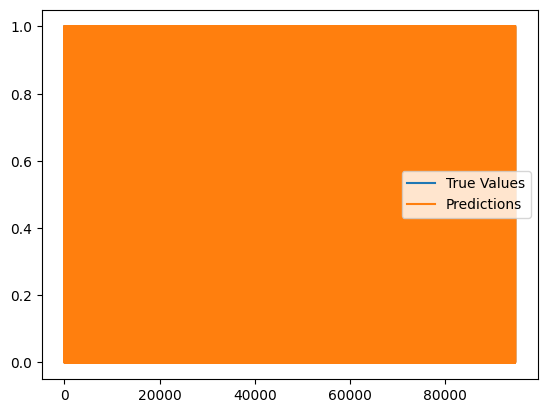

In [5]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions')
plt.legend()
plt.show()


Chatbot Implementation

In [6]:
def correct_spelling(input_word):
    input_vector = vectorizer.transform([input_word])
    prediction = pipeline.predict(input_vector)

    if prediction == 0:
        return "Nothing Wrong!"

    # Find the most similar word
    similarities = model.predict_proba(input_vector)[0]
    best_match = word_list[similarities.argmax()]
    accuracy = similarities.max() * 100

    return f"Suggested Correction: {best_match}, Matching Accuracy: {accuracy:.2f}%"

# Example usage
print(correct_spelling("Harro"))
print(correct_spelling("correct"))


Nothing Wrong!
Nothing Wrong!
